# MACHINE LEARNING - LINEAR REGRESSION 

# REGRESSION 

It is a type os supervised machine learning algorithms (supervised ML is a type of ML it involves traing models on label datasets, where each input data points has corresponding output or traget variable, the goal is to learn a mapping from inputs to outputs to make prediction on unseen data). It is used to predict a continuous numerical values based on one or more input features.It is aims to model the relationship between a dependent variable(the continuous output to be predicted) and one or more independent variable (input features)

## LINEAR REGRESSION 

It founds the relationship between target and one or more features 
It tries to fit a stright lines through the data points that predict the output 

## simple linear regression 

It predict the target variable based on single feature

## Multiple linear regression 

It predict the target variable based on one or more features 


**EQUATION:** Prediction Function 

- SIMPLE LINEAR REGRESSION 

**Y=mX+c**

- Y >> Dependent variable
- X >> Independent variable
- m >> Slope of the line 
- c >> Intercept

SLOPE : how much y changes when x increases by 1
INTERCEPT : The value of y when x=0 

- MULTIPLE LINEAR REGRESSION

**y=b0+b1x1+b2x2+⋯+bnxn**

- y >> Dependent variable
- x1...xn >> Independent variable
- b0 is Intercept
- b1..bn are coefficients (slopes)

In [54]:
# create a dataframe 

import pandas as pd 
import numpy as np 

np.random.seed(42)

n_samp=10000

data ={
    "House_size_sqft":np.random.normal(2000,500,n_samp).astype(int),
    "Num_of_bedrooms":np.random.randint(1,7,n_samp),
    "Num_of_bathrooms":np.random.randint(1,4,n_samp),
    "Lot_size_sqrt":np.random.normal(7500,2000,n_samp).astype(int),
    "Garage_size":np.random.randint(0,3,n_samp),
    "year_built":np.random.randint(1950,2024,n_samp),
    "Nearby_schls_rating":np.random.randint(1,11,n_samp),
    "Distance_to_citycenter_km":np.random.normal(10,5,n_samp).clip(1,40),
    "crime_rate":np.random.uniform(0,1,n_samp)
}

df=pd.DataFrame(data)

df["House_price"]=(
    df["House_size_sqft"]*150
    + df["Num_of_bedrooms"]*10000
    +df["Num_of_bathrooms"]*8000
    +df["Lot_size_sqrt"]*5
    +df["Garage_size"]*12000
    +df["Nearby_schls_rating"]*2000
    -df["Distance_to_citycenter_km"]*3000
    -df["crime_rate"]*50000
    +np.random.normal(0,20000,n_samp)
)
df["House_price"]=df["House_price"].round(2)

display(df.head())
print("\n shape of dataset:",df.shape)

,House_size_sqft,Num_of_bedrooms,Num_of_bathrooms,Lot_size_sqrt,Garage_size,year_built,Nearby_schls_rating,Distance_to_citycenter_km,crime_rate,House_price
0,2248,2,1,9829,1,2013,5,9.991646,0.094538,426121.42
1,1930,1,3,6712,0,1993,4,18.497658,0.681169,231405.61
2,2323,5,2,8647,2,2000,10,9.697348,0.130955,472840.69
3,2761,2,3,10055,0,2014,1,16.067200,0.732614,436360.82
4,1882,6,3,6589,1,2014,5,8.066035,0.944566,352086.16



 shape of dataset: (10000, 10)


np.random.seed(42)

- Set s the random seed to 42 so that every time run the code , you ger the same random value

n_samp=10000

- we want 10000 rows

data 

**House_size_sqft**: (Normally distributed around 2000 sqrt with ±500 variation)

**Num_of_bedrooms**:(random integers from 1 to 5)

**Num_of_bathrooms**:(random integers from 1 to 3)

**Lot_size_sqrt**: (Normally distributed around 7500 sqrt with ±2000 variation) 

**Garage_size**:0,1 or 2

**year_built**: Any year between 1950 and 2024

**Nearby_schls_rating**: rating between 1 and 10

**Distance_to_citycenter_km**: normally distributed around 10km,limited(clipped) between 1km and 40km.

**crime_rate**: random float between 0 and 1

df=pd.DataFrame(data)

converts the data into pandas dataframe(tabel format)

df["House_price"] = Gnerate target variable 

In [55]:
df.isnull().sum()

House_size_sqft              0
Num_of_bedrooms              0
Num_of_bathrooms             0
Lot_size_sqrt                0
Garage_size                  0
year_built                   0
Nearby_schls_rating          0
Distance_to_citycenter_km    0
crime_rate                   0
House_price                  0
dtype: int64

**from sklearn.model_selection import train_test_split**

sklearn is scikit learn, the train_test_split function from the model_selection module within the sklearn

The train_test_split is a tool for evaluating the performance of machine learning models, It divides a datest into 2 subsets:

training set(Learns patterns and relationships from this data)

Testing set(It is used to evaludate the trained model's performace on unseen data)

x >> Independent variable 

y >> Dependent variable 

In [56]:
from sklearn.model_selection import train_test_split

x=df.drop("House_price",axis=1)
y=df["House_price"]

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("training set")
display("x_train: \n",x_train,"\n y_train:\n",y_train)
print("testing set")
display("x_test:\n",x_test,"\ny_test:\n",y_test)

training set


'x_train: \n'

,House_size_sqft,Num_of_bedrooms,Num_of_bathrooms,Lot_size_sqrt,Garage_size,year_built,Nearby_schls_rating,Distance_to_citycenter_km,crime_rate
9254,2109,4,1,10539,0,2012,8,12.760759,0.429023
1561,1626,6,2,4197,1,1975,6,7.731615,0.637047
1670,1880,6,2,7631,2,1998,1,1.000000,0.242501
6087,1226,2,2,6652,1,2009,5,11.620388,0.187915
6669,2351,3,3,6279,2,1980,8,21.744715,0.172404
...,...,...,...,...,...,...,...,...,...
5734,1712,2,3,8166,0,1980,8,8.184669,0.112618
5191,1979,6,3,9289,0,2000,3,2.127339,0.525478
5390,1650,3,3,5861,2,1961,5,1.000179,0.329164
860,2101,1,2,9995,0,2016,4,8.143371,0.233708


'\n y_train:\n'

9254    366380.89
1561    307214.81
1670    426448.40
6087    242414.48
6669    427024.06
          ...    
5734    342632.45
5191    414957.85
5390    316035.78
860     365542.95
7270    216546.40
Name: House_price, Length: 8000, dtype: float64

testing set


'x_test:\n'

,House_size_sqft,Num_of_bedrooms,Num_of_bathrooms,Lot_size_sqrt,Garage_size,year_built,Nearby_schls_rating,Distance_to_citycenter_km,crime_rate
6252,3318,1,2,5466,2,1957,1,5.950442,0.534065
4684,1481,4,1,7283,1,2001,9,7.599256,0.808121
1731,1825,5,1,4884,0,1992,8,15.056988,0.898624
4742,2000,5,3,11384,2,1977,3,11.754059,0.108647
4521,2537,4,2,5512,0,1955,2,12.694448,0.322836
...,...,...,...,...,...,...,...,...,...
6412,1098,2,1,11925,2,2019,1,1.546213,0.107986
8285,2472,1,3,7450,1,1966,6,3.365302,0.453558
7853,2270,2,1,9564,0,1997,9,6.212244,0.488471
1095,1959,2,2,8207,1,2001,6,18.702845,0.252136


'\ny_test:\n'

6252    556975.84
4684    278555.56
1731    284510.03
4742    448125.59
4521    428034.38
          ...    
6412    249793.61
8285    430040.96
7853    403421.07
1095    307821.39
6929    292044.21
Name: House_price, Length: 2000, dtype: float64

**from sklearn import linear_model**

It is used to build a linear regression model using sklearn
and linear_model is used to perform in one of the classification type is logistic regression 

- model.fit(x_train,y_train)

Teaching the model to learn the relationship between features and the target 

In [58]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**m=model.coef_[0]**

**c=model.intercept_**

m = slope
- simple linear regression(1 feature) - it will have 1 value
- multiple linear regression (many feature) - it will be an array of slopes

c = intercept

The point where the regression line crosses the y-axis 
even if all x value are zeros, the model predicts c.

In [62]:
m=model.coef_
c=model.intercept_
print("slope",m)
print("intercept",c)

slope [ 1.50271204e+02  1.01206840e+04  8.15292562e+03  4.97132738e+00
  1.18472624e+04 -5.73226042e+00  1.95831104e+03 -2.96336391e+03
 -4.88693284e+04]
intercept 9794.342210150964


**y_pred=model.predict(x_test)**

Trained ML model to make predictions on a new , unseen dataset,x_test
x_test represents the features of the data for which predictions are desired
The output of this prediction y_pred will contain the model estimated target values for each corresponding input in x_test

In [60]:
y_pred=model.predict(x_test)
display(y_pred)
display(y_test)

array([532696.09804217, 273177.93474474, 282788.92830234, ...,
       390747.13989544, 325904.34408646, 296078.75987787])

6252    556975.84
4684    278555.56
1731    284510.03
4742    448125.59
4521    428034.38
          ...    
6412    249793.61
8285    430040.96
7853    403421.07
1095    307821.39
6929    292044.21
Name: House_price, Length: 2000, dtype: float64

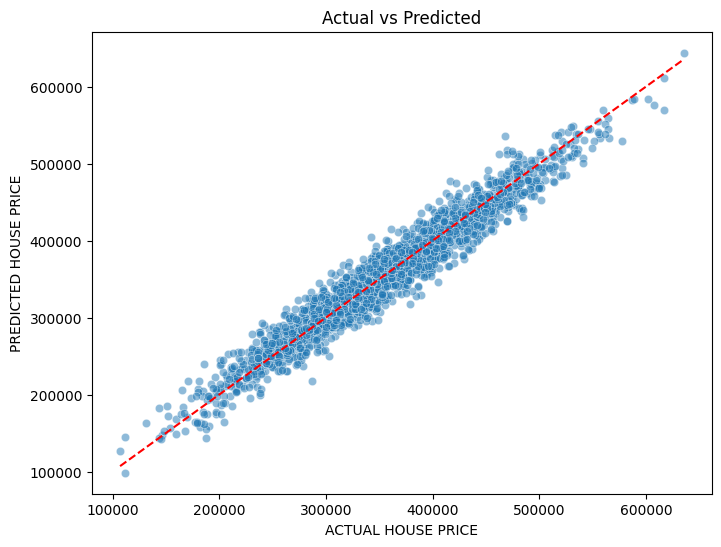

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.xlabel("ACTUAL HOUSE PRICE")
plt.ylabel("PREDICTED HOUSE PRICE")
plt.title("Actual vs Predicted")
plt.show()

### EVALUATION METRICS 

**MSE** Average of squared differences between actual and predicted values 

**RMSE** Square root of MSE, same unit as target variable

**R^2** How well model explain varience in target 
- 1 = perfect fit
- 0 = no predictive power
- negative = worse than just predicting the mean

In [64]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("mean squre error",mse)
print("r2 score",r2)
print("root mean squre error",rmse)

mean squre error 397661317.2226842
r2 score 0.9414458768370734
root mean squre error 19941.447219865568


In [65]:
# simple linear regression 

X=df[["House_size_sqft"]]
Y=df["House_price"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("training set")
display("X_train: \n",X_train,"\n Y_train:\n",Y_train)
print("testing set")
display("X_test:\n",X_test,"\nY_test:\n",Y_test)

training set


'X_train: \n'

,House_size_sqft
9254,2109
1561,1626
1670,1880
6087,1226
6669,2351
...,...
5734,1712
5191,1979
5390,1650
860,2101


'\n Y_train:\n'

9254    366380.89
1561    307214.81
1670    426448.40
6087    242414.48
6669    427024.06
          ...    
5734    342632.45
5191    414957.85
5390    316035.78
860     365542.95
7270    216546.40
Name: House_price, Length: 8000, dtype: float64

testing set


'X_test:\n'

,House_size_sqft
6252,3318
4684,1481
1731,1825
4742,2000
4521,2537
...,...
6412,1098
8285,2472
7853,2270
1095,1959


'\nY_test:\n'

6252    556975.84
4684    278555.56
1731    284510.03
4742    448125.59
4521    428034.38
          ...    
6412    249793.61
8285    430040.96
7853    403421.07
1095    307821.39
6929    292044.21
Name: House_price, Length: 2000, dtype: float64

In [75]:
s_model=linear_model.LinearRegression()
s_model.fit(X_train,Y_train)

LinearRegression()

In [76]:
y_pred_=s_model.predict(X_test)

In [77]:
m=s_model.coef_[0]
c=s_model.intercept_
print(f"slope = {m:.2f} ,intercept= {c:.2f}")


slope = 150.10 ,intercept= 56478.18


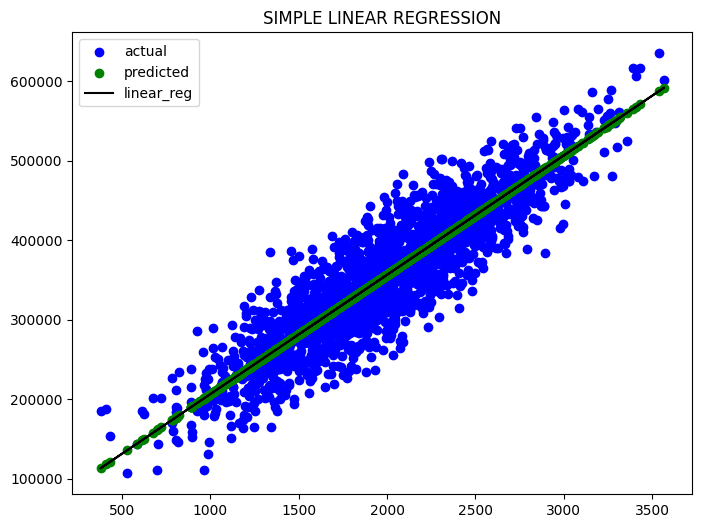

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(X_test,Y_test,color="blue",label="actual")
plt.scatter(X_test,y_pred_,color="green",label="predicted")
plt.plot(X_test,y_pred_,color="black",label="linear_reg")
plt.legend()
plt.title("SIMPLE LINEAR REGRESSION")
plt.show()